<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge and Lasso Regression

# Ridge and Lasso Regression
Ridge and Lasso Regression are regularization techniques applied to Linear Regression to prevent overfitting by penalizing large coefficients:
* **Ridge Regression** adds an L2 penalty (sum of squared coefficients)
* **Lasso Regression** adds an L1 penalty (sum of absolute values of coefficients), which can lead to feature selection by shrinking some coefficients to zero

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data (e.g., house size vs. house price)
X = np.array([[1400], [1600], [1700], [1875], [1100], [1550], [2350], [2450]])
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
# alpha controls the regularization strength
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression MSE: \n", ridge_mse)
print("Ridge Regression Prediction: \n", ridge_pred)

# Lasso Regression
# alpha controls the regularization strength
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression MSE: \n", lasso_mse)
print("Lasso Regression Prediction: \n", lasso_pred)

Ridge Regression MSE: 
 1889550954.931038
Ridge Regression Prediction: 
 [267452.98316853 261363.48901211]
Lasso Regression MSE: 
 1889550817.1042557
Lasso Regression Prediction: 
 [267452.96546286 261363.46714039]


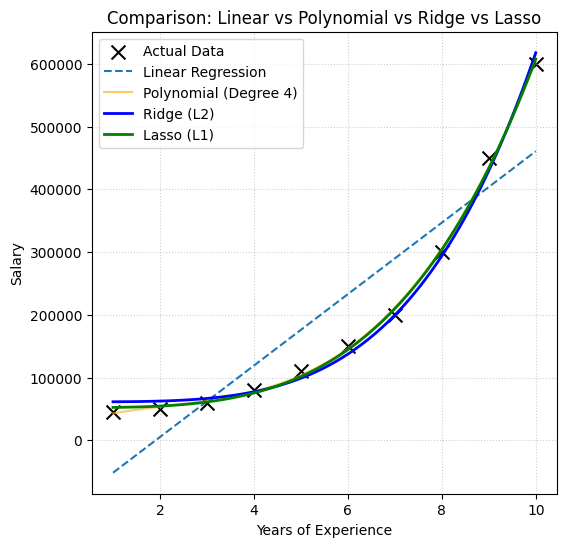

Ridge Coefficients: [ 0.          1.37960333  9.3208195  43.32030916 51.22218898]
Lasso Coefficients: [  0.           0.           0.         236.23452612  31.94706357]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Sample Data (from your screenshots: Experience vs. Salary)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 450000, 600000])

# Generate a range of values for smooth plotting
X_range = np.linspace(1, 10, 100).reshape(-1, 1)

# Linear Regression (Simple)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X_range)

# Polynomial Regression (Degree 4 - No Regularization)
# We use degree 4 to show how it can overfit without regularization
poly_reg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_reg.fit(X, y)
y_poly_pred = poly_reg.predict(X_range)

# Ridge Regression (L2 Regularization)
# alpha=1e5 is a strong penalty to make the effect visible
ridge_reg = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=1e5))
ridge_reg.fit(X, y)
y_ridge_pred = ridge_reg.predict(X_range)

# Lasso Regression (L1 Regularization)
# alpha=1e5 helps simplify the model by penalizing coefficients
lasso_reg = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=1e5, max_iter=10000))
lasso_reg.fit(X, y)
y_lasso_pred = lasso_reg.predict(X_range)

# Comparison Plot
plt.figure(figsize=(6, 6))

# Plot actual data points
plt.scatter(X, y, color='black', marker='x', s=100, label='Actual Data')

# Plot different regression models
plt.plot(X_range, y_lin_pred, label='Linear Regression', linestyle='--')
plt.plot(X_range, y_poly_pred, label='Polynomial (Degree 4)', color='orange', alpha=0.6)
plt.plot(X_range, y_ridge_pred, label='Ridge (L2)', color='blue', linewidth=2)
plt.plot(X_range, y_lasso_pred, label='Lasso (L1)', color='green', linewidth=2)

# Chart labels and styling
plt.title('Comparison: Linear vs Polynomial vs Ridge vs Lasso')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Print Model Coefficients to show Lasso's feature selection
print("Ridge Coefficients:", ridge_reg.named_steps['ridge'].coef_)
print("Lasso Coefficients:", lasso_reg.named_steps['lasso'].coef_)